In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0, 1, 2])

In [5]:
df.sample(5)

,0,1,2
157,3,12.45,3.03
160,3,12.36,3.83
119,2,12.00,3.43
173,3,13.71,5.65
108,2,12.22,1.29


In [6]:
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [7]:
df.sample(5)

,Class label,Alcohol,Malic acid
149,3,13.08,3.90
101,2,12.60,1.34
50,1,13.05,1.73
60,2,12.33,1.10
132,3,12.81,2.31


<Axes: xlabel='Alcohol', ylabel='Density'>

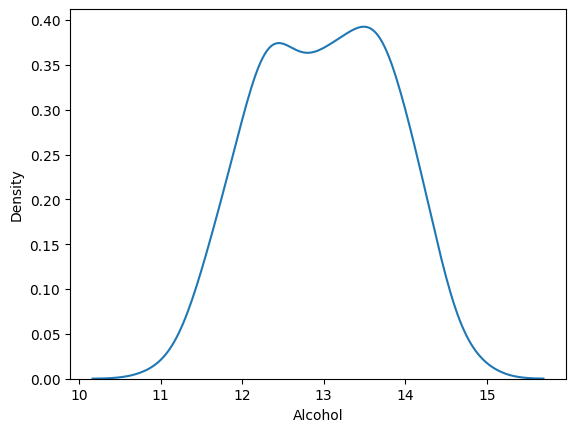

In [8]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

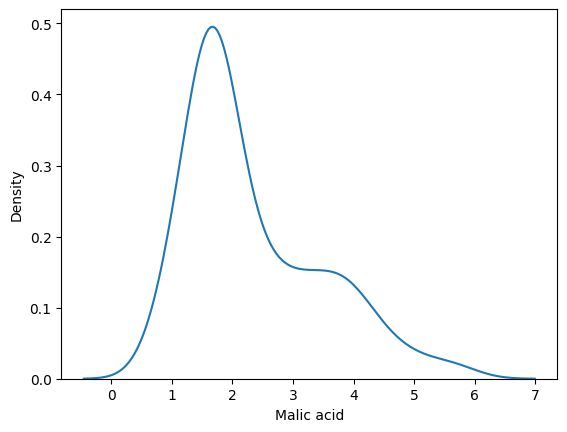

In [9]:
sns.kdeplot(df['Malic acid'])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),df['Class label'],test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#fitting the scaler with Xtrain so it can learn the mean and deviation values
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

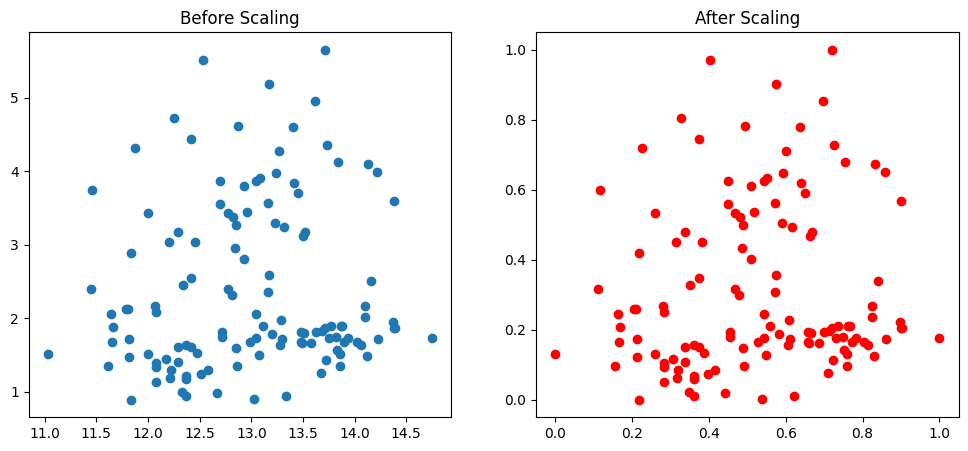

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],color='red')
ax2.set_title("After Scaling")
plt.show()


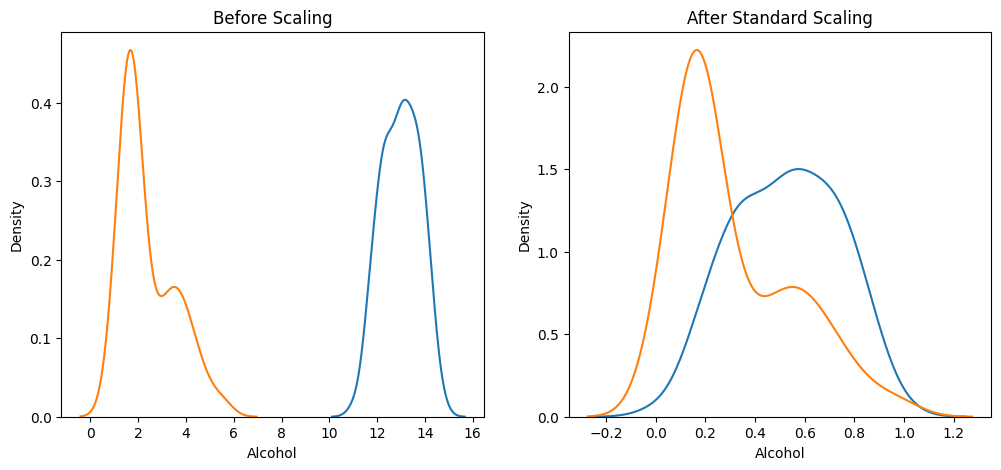

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()